# Analyze this 2018 Solution

In [1]:
#imports
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV,StratifiedKFold, train_test_split
kfold = StratifiedKFold(n_splits=5)
from sklearn.metrics import roc_auc_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [2]:
#import data
train=pd.read_csv("train.csv")
lb_data=pd.read_csv("lb_data.csv")
test=pd.read_csv("eval.csv")
dictionary=pd.read_csv("dict.csv")
sample=pd.read_csv("sample.csv")

C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0


In [4]:
train.describe()

,application_key,mvar2,mvar3,mvar4,mvar5,mvar14,mvar21,mvar22,mvar23,mvar24,mvar33,mvar44,default_ind
count,80000.000000,74447.000000,79499.000000,79499.000000,79499.00000,8.000000e+04,57439.000000,50876.000000,39752.000000,61098.000000,78249.000000,72255.000000,80000.000000
mean,270031.500000,1.105629,5.280955,0.474516,1.12472,1.960918e+05,57.790097,4423.856509,4305.929828,69.981834,6.996557,0.705285,0.246213
std,23094.155105,1.645299,10.815463,1.796261,5.99545,7.888377e+06,35.577165,3782.048321,3864.873106,300.080442,7.650139,0.245879,0.430806
min,230032.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.170000,0.000000,0.000000,0.000000,0.083300,0.060660,0.000000
25%,250031.750000,0.140100,0.000000,0.000000,0.00000,4.261300e+04,26.930000,726.715000,541.157500,9.892500,1.166700,0.515220,0.000000
50%,270031.500000,0.538900,0.300000,0.000000,0.00000,7.234300e+04,59.690000,3974.425000,3700.000000,40.440000,3.916700,0.737030,0.000000
75%,290031.250000,1.445050,6.447000,0.000000,0.00000,1.238750e+05,86.620000,7579.297500,7520.950000,76.540000,10.666700,0.943475,0.000000
max,310031.000000,44.630100,286.858000,114.696000,226.52700,9.910000e+08,1305.250000,64800.000000,124533.330000,27867.400000,76.000000,1.000000,1.000000


In [5]:
train.count()

application_key    80000
mvar1              80000
mvar2              74447
mvar3              79499
mvar4              79499
mvar5              79499
mvar6              80000
mvar7              80000
mvar8              80000
mvar9              80000
mvar10             80000
mvar11             80000
mvar12             80000
mvar13             80000
mvar14             80000
mvar15             80000
mvar16             80000
mvar17             80000
mvar18             80000
mvar19             80000
mvar20             80000
mvar21             57439
mvar22             50876
mvar23             39752
mvar24             61098
mvar25             80000
mvar26             80000
mvar27             80000
mvar28             80000
mvar29             80000
mvar30             80000
mvar31             80000
mvar32             80000
mvar33             78249
mvar34             80000
mvar35             80000
mvar36             80000
mvar37             80000
mvar38             80000
mvar39             80000


# Preprocessing & Feature engineering

In [ ]:
#create feature with categorical feature
'''categorical = ["mvar47"]

def replacing_categorical(X):
    x=train.groupby(X)["default_ind"].mean()
    y=train.groupby(X)["default_ind"].std()
    train[X+str("_mean")]= train[X].apply(lambda X1: x[X1])
    #train[X+str("_std")] = train[X].apply(lambda X2: y[X2])
    lb_data[X+str("_mean")]= lb_data[X].apply(lambda X1: x[X1])
    #lb_data[X+str("_std")] = lb_data[X].apply(lambda X2: y[X2])
#     del data[X]

for i in categorical:
    replacing_categorical(i)'''

In [ ]:
#create dummies for categorical feature
'''categorical = ["mvar47"]

for i in categorical:
    dummy = pd.get_dummies(train[i], prefix=i)
    train = pd.concat([train, dummy], axis=1)
    train.drop([i], axis=1, inplace=True)
    dummy = pd.get_dummies(lb_data[i], prefix=i)
    lb_data = pd.concat([lb_data, dummy], axis=1)
    lb_data.drop([i], axis=1, inplace=True)'''

In [ ]:
# Missing data analysis
'''import seaborn as sns
totalMissing = train.isnull().sum().sort_values(ascending=False)
percentage = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)

missingData = pd.concat([totalMissing,percentage],axis=1,keys=['Total','Percentage'])
plt.subplots(figsize=(15,20))
plt.xticks(rotation='90')
sns.barplot(x=totalMissing.index[:24],y=percentage[:24])
plt.xlabel('features')
plt.ylabel('percentage of missing data')
plt.title('percent of missing data by feature')
plt.show()'''

# columns to be dropped accord to %
'''columnsToDrop = missingData[missingData['Percentage']>60].index

train = train.drop(columnsToDrop, axis=1)
lb_data = lb_data.drop(columnsToDrop, axis=1)
print(lb_data.shape)'''


In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train.mvar47)
train.mvar47=label_encoder.transform(train.mvar47)
test.mvar47=label_encoder.transform(test.mvar47)
lb_data.mvar47=label_encoder.transform(lb_data.mvar47)

In [7]:
#replace str 'na' and 'missing' with Nan
for col in train.columns.values.tolist():
    if train[col].dtypes=='object':
        train[col].replace(['na','missing'],[np.nan,np.nan], inplace=True)
        train[col]=train[col].astype("float")
    
    
for col in test.columns.values.tolist():
    if test[col].dtypes=='object':
        test[col].replace(['na','missing'],[np.nan,np.nan], inplace=True)
        test[col]=test[col].astype("float")
    
    
for col in lb_data.columns.values.tolist():
    if lb_data[col].dtypes=='object':
        lb_data[col].replace(['na','missing'],[np.nan,np.nan], inplace=True)
        lb_data[col]=lb_data[col].astype("float")

In [8]:
# Dataset contains many variables which are very skewed so those variables were normalized using box-cox transformations
from scipy.stats import skew 
from scipy.special import boxcox1p

# extracting numerical features
numeric_features = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
numeric_features = train[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :numeric_features})
highly_skewed = skewness.index.values[:20]

#remove skewness
lam = 0.15
for feat in highly_skewed:
    train[feat] = boxcox1p(train[feat], lam)
    test[feat] = boxcox1p(test[feat], lam)
    lb_data[feat] = boxcox1p(lb_data[feat], lam)

In [9]:
#new feature creation
#train['total_util_credit_line']=(train['mvar17']*train['mvar18'])/100
#train['Severity_on_loan']=train['mvar3']-(train['mvar4']+train['mvar5'])/2
#train['feature1']=(train['mvar24']*train['mvar34'])

In [10]:
#severity of customers
train['Total_Severity']=train['mvar3']+train['mvar4']+train['mvar5']
#maximum credit total
train['max_credit_avail']=train['mvar7']+train['mvar8']
#total credits
train['total_num_avail']= train['mvar17']+train['mvar18']
#total numbers 75%
train['total_75%_credit']= train['mvar19']+train['mvar20']
#total max loan
#train['Max_tenure_total']=train['mvar30']+train['mvar31']
#total utilization
#train['total_utilization']= train['mvar40']+train['mvar41']
#total missed payments on loan in 2 years
#train['missed_payments']=train['mvar45']+train['mvar46']

In [11]:
#severity of customers
test['Total_Severity']=test['mvar3']+test['mvar4']+test['mvar5']
#maximum credit total
test['max_credit_avail']=test['mvar7']+test['mvar8']
#total credits
test['total_num_avail']= test['mvar17']+test['mvar18']
#total numbers 75%
test['total_75%_credit']= test['mvar19']+test['mvar20']

In [12]:
#lb_data['total_util_credit_line']=(lb_data['mvar17']*lb_data['mvar18'])/100
#lb_data['Severity_on_loan']=lb_data['mvar3']-(lb_data['mvar4']+lb_data['mvar5'])/2
#lb_data['feature1']=(lb_data['mvar24']*lb_data['mvar34'])

In [13]:
#severity of customers
lb_data['Total_Severity']=lb_data['mvar3']+lb_data['mvar4']+lb_data['mvar5']
#maximum credit total
lb_data['max_credit_avail']=lb_data['mvar7']+lb_data['mvar8']
#total credits
lb_data['total_num_avail']= lb_data['mvar17']+lb_data['mvar18']
#total numbers 75%
lb_data['total_75%_credit']= lb_data['mvar19']+lb_data['mvar20']
#total max loan
#lb_data['Max_tenure_total']=lb_data['mvar30']+lb_data['mvar31']
#total utilization
#lb_data['total_utilization']= lb_data['mvar40']+lb_data['mvar41']
#total missed payments on loan in 2 years
#lb_data['missed_payments']=lb_data['mvar45']+lb_data['mvar46']

# Model

In [14]:
Y_train = train["default_ind"]
X_train = train.drop(["default_ind","application_key"], axis=1)
X_train.shape, Y_train.shape

((80000, 51), (80000,))

In [15]:
train_x,val_x,train_y,val_y = train_test_split(X_train, Y_train, test_size = 0.10, random_state=14)
train_x.shape,val_x.shape,train_y.shape,val_y.shape

((72000, 51), (8000, 51), (72000,), (8000,))

In [17]:
import lightgbm
train_data = lightgbm.Dataset(train_x, label=train_y)
test_data = lightgbm.Dataset(val_x, label=val_y)

In [18]:
#used tuned parameters after applying gridsearch
para={'boosting_type': 'gbdt',
 'colsample_bytree': 0.65,
 'learning_rate': 0.005,
 'max_bin': 512,
 'max_depth': -1,
 'metric': 'auc',
 'min_child_samples': 5,
 'min_child_weight': 1,
 'min_split_gain': 0.5,
 'nthread': 3,
 'num_class': 1,
 'num_leaves': 23,
 'objective': 'binary',
 'reg_alpha': 0.8,
 'reg_lambda': 1.2,
 'scale_pos_weight': 1,
 'subsample': 0.7,
 'subsample_for_bin': 200,
 'subsample_freq': 1}



model = lightgbm.train(para,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=50,
                      )

[1]	valid_0's auc: 0.79499
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.808444
[3]	valid_0's auc: 0.811439
[4]	valid_0's auc: 0.815877
[5]	valid_0's auc: 0.815916
[6]	valid_0's auc: 0.816053
[7]	valid_0's auc: 0.816948
[8]	valid_0's auc: 0.817431
[9]	valid_0's auc: 0.818182
[10]	valid_0's auc: 0.818489
[11]	valid_0's auc: 0.818433
[12]	valid_0's auc: 0.818649
[13]	valid_0's auc: 0.819494
[14]	valid_0's auc: 0.819669
[15]	valid_0's auc: 0.819604
[16]	valid_0's auc: 0.820462
[17]	valid_0's auc: 0.820187
[18]	valid_0's auc: 0.820048
[19]	valid_0's auc: 0.819662
[20]	valid_0's auc: 0.820108
[21]	valid_0's auc: 0.819798
[22]	valid_0's auc: 0.820181
[23]	valid_0's auc: 0.820156
[24]	valid_0's auc: 0.820402
[25]	valid_0's auc: 0.820344
[26]	valid_0's auc: 0.820278
[27]	valid_0's auc: 0.820624
[28]	valid_0's auc: 0.820406
[29]	valid_0's auc: 0.820142
[30]	valid_0's auc: 0.819986
[31]	valid_0's auc: 0.819844
[32]	valid_0's auc: 0.819624
[33]	valid_0's auc: 

[280]	valid_0's auc: 0.824938
[281]	valid_0's auc: 0.824966
[282]	valid_0's auc: 0.824988
[283]	valid_0's auc: 0.824988
[284]	valid_0's auc: 0.825004
[285]	valid_0's auc: 0.825006
[286]	valid_0's auc: 0.825024
[287]	valid_0's auc: 0.825042
[288]	valid_0's auc: 0.825057
[289]	valid_0's auc: 0.82509
[290]	valid_0's auc: 0.825117
[291]	valid_0's auc: 0.825123
[292]	valid_0's auc: 0.825151
[293]	valid_0's auc: 0.825171
[294]	valid_0's auc: 0.825166
[295]	valid_0's auc: 0.82521
[296]	valid_0's auc: 0.825197
[297]	valid_0's auc: 0.825203
[298]	valid_0's auc: 0.825216
[299]	valid_0's auc: 0.825243
[300]	valid_0's auc: 0.825258
[301]	valid_0's auc: 0.825267
[302]	valid_0's auc: 0.825269
[303]	valid_0's auc: 0.82531
[304]	valid_0's auc: 0.825313
[305]	valid_0's auc: 0.825324
[306]	valid_0's auc: 0.825344
[307]	valid_0's auc: 0.825354
[308]	valid_0's auc: 0.825373
[309]	valid_0's auc: 0.825394
[310]	valid_0's auc: 0.8254
[311]	valid_0's auc: 0.825433
[312]	valid_0's auc: 0.825448
[313]	valid_0's

[555]	valid_0's auc: 0.828935
[556]	valid_0's auc: 0.828941
[557]	valid_0's auc: 0.828952
[558]	valid_0's auc: 0.82897
[559]	valid_0's auc: 0.828981
[560]	valid_0's auc: 0.828997
[561]	valid_0's auc: 0.829008
[562]	valid_0's auc: 0.829013
[563]	valid_0's auc: 0.829026
[564]	valid_0's auc: 0.829039
[565]	valid_0's auc: 0.829052
[566]	valid_0's auc: 0.829077
[567]	valid_0's auc: 0.829091
[568]	valid_0's auc: 0.82911
[569]	valid_0's auc: 0.829123
[570]	valid_0's auc: 0.829141
[571]	valid_0's auc: 0.829152
[572]	valid_0's auc: 0.829157
[573]	valid_0's auc: 0.829163
[574]	valid_0's auc: 0.829175
[575]	valid_0's auc: 0.829197
[576]	valid_0's auc: 0.829208
[577]	valid_0's auc: 0.829217
[578]	valid_0's auc: 0.82922
[579]	valid_0's auc: 0.829235
[580]	valid_0's auc: 0.829253
[581]	valid_0's auc: 0.829265
[582]	valid_0's auc: 0.829278
[583]	valid_0's auc: 0.829285
[584]	valid_0's auc: 0.829291
[585]	valid_0's auc: 0.829306
[586]	valid_0's auc: 0.829325
[587]	valid_0's auc: 0.829328
[588]	valid_0

[834]	valid_0's auc: 0.831512
[835]	valid_0's auc: 0.831516
[836]	valid_0's auc: 0.831519
[837]	valid_0's auc: 0.831532
[838]	valid_0's auc: 0.831535
[839]	valid_0's auc: 0.831536
[840]	valid_0's auc: 0.831537
[841]	valid_0's auc: 0.831537
[842]	valid_0's auc: 0.831555
[843]	valid_0's auc: 0.831572
[844]	valid_0's auc: 0.83158
[845]	valid_0's auc: 0.831586
[846]	valid_0's auc: 0.831601
[847]	valid_0's auc: 0.831605
[848]	valid_0's auc: 0.831611
[849]	valid_0's auc: 0.831616
[850]	valid_0's auc: 0.831624
[851]	valid_0's auc: 0.831625
[852]	valid_0's auc: 0.831631
[853]	valid_0's auc: 0.83163
[854]	valid_0's auc: 0.831629
[855]	valid_0's auc: 0.831638
[856]	valid_0's auc: 0.831653
[857]	valid_0's auc: 0.831663
[858]	valid_0's auc: 0.831668
[859]	valid_0's auc: 0.831674
[860]	valid_0's auc: 0.831685
[861]	valid_0's auc: 0.83169
[862]	valid_0's auc: 0.831706
[863]	valid_0's auc: 0.831705
[864]	valid_0's auc: 0.83171
[865]	valid_0's auc: 0.831716
[866]	valid_0's auc: 0.831721
[867]	valid_0'

[1109]	valid_0's auc: 0.833151
[1110]	valid_0's auc: 0.833158
[1111]	valid_0's auc: 0.833168
[1112]	valid_0's auc: 0.833186
[1113]	valid_0's auc: 0.83319
[1114]	valid_0's auc: 0.833194
[1115]	valid_0's auc: 0.833208
[1116]	valid_0's auc: 0.833217
[1117]	valid_0's auc: 0.833223
[1118]	valid_0's auc: 0.833227
[1119]	valid_0's auc: 0.833236
[1120]	valid_0's auc: 0.833248
[1121]	valid_0's auc: 0.833248
[1122]	valid_0's auc: 0.833254
[1123]	valid_0's auc: 0.833258
[1124]	valid_0's auc: 0.833268
[1125]	valid_0's auc: 0.833276
[1126]	valid_0's auc: 0.833279
[1127]	valid_0's auc: 0.833295
[1128]	valid_0's auc: 0.8333
[1129]	valid_0's auc: 0.833296
[1130]	valid_0's auc: 0.833308
[1131]	valid_0's auc: 0.833315
[1132]	valid_0's auc: 0.833325
[1133]	valid_0's auc: 0.833326
[1134]	valid_0's auc: 0.833325
[1135]	valid_0's auc: 0.833331
[1136]	valid_0's auc: 0.833343
[1137]	valid_0's auc: 0.833346
[1138]	valid_0's auc: 0.833341
[1139]	valid_0's auc: 0.833344
[1140]	valid_0's auc: 0.83336
[1141]	valid

[1382]	valid_0's auc: 0.834489
[1383]	valid_0's auc: 0.834494
[1384]	valid_0's auc: 0.834502
[1385]	valid_0's auc: 0.834505
[1386]	valid_0's auc: 0.834512
[1387]	valid_0's auc: 0.834514
[1388]	valid_0's auc: 0.83451
[1389]	valid_0's auc: 0.834514
[1390]	valid_0's auc: 0.834522
[1391]	valid_0's auc: 0.834526
[1392]	valid_0's auc: 0.83453
[1393]	valid_0's auc: 0.834537
[1394]	valid_0's auc: 0.834542
[1395]	valid_0's auc: 0.834543
[1396]	valid_0's auc: 0.83454
[1397]	valid_0's auc: 0.834545
[1398]	valid_0's auc: 0.834541
[1399]	valid_0's auc: 0.834552
[1400]	valid_0's auc: 0.834555
[1401]	valid_0's auc: 0.834554
[1402]	valid_0's auc: 0.83456
[1403]	valid_0's auc: 0.834554
[1404]	valid_0's auc: 0.834551
[1405]	valid_0's auc: 0.834563
[1406]	valid_0's auc: 0.834561
[1407]	valid_0's auc: 0.834564
[1408]	valid_0's auc: 0.834575
[1409]	valid_0's auc: 0.834575
[1410]	valid_0's auc: 0.834578
[1411]	valid_0's auc: 0.834572
[1412]	valid_0's auc: 0.834571
[1413]	valid_0's auc: 0.834572
[1414]	valid

[1650]	valid_0's auc: 0.835209
[1651]	valid_0's auc: 0.835211
[1652]	valid_0's auc: 0.835206
[1653]	valid_0's auc: 0.835214
[1654]	valid_0's auc: 0.835223
[1655]	valid_0's auc: 0.835227
[1656]	valid_0's auc: 0.835224
[1657]	valid_0's auc: 0.835231
[1658]	valid_0's auc: 0.835232
[1659]	valid_0's auc: 0.835235
[1660]	valid_0's auc: 0.835237
[1661]	valid_0's auc: 0.835235
[1662]	valid_0's auc: 0.835234
[1663]	valid_0's auc: 0.835239
[1664]	valid_0's auc: 0.835241
[1665]	valid_0's auc: 0.835246
[1666]	valid_0's auc: 0.835257
[1667]	valid_0's auc: 0.835256
[1668]	valid_0's auc: 0.835272
[1669]	valid_0's auc: 0.835277
[1670]	valid_0's auc: 0.835277
[1671]	valid_0's auc: 0.835283
[1672]	valid_0's auc: 0.835287
[1673]	valid_0's auc: 0.835286
[1674]	valid_0's auc: 0.835287
[1675]	valid_0's auc: 0.835296
[1676]	valid_0's auc: 0.835311
[1677]	valid_0's auc: 0.835312
[1678]	valid_0's auc: 0.835307
[1679]	valid_0's auc: 0.835313
[1680]	valid_0's auc: 0.835311
[1681]	valid_0's auc: 0.835312
[1682]	v

[1922]	valid_0's auc: 0.835859
[1923]	valid_0's auc: 0.835864
[1924]	valid_0's auc: 0.83587
[1925]	valid_0's auc: 0.835868
[1926]	valid_0's auc: 0.835871
[1927]	valid_0's auc: 0.835874
[1928]	valid_0's auc: 0.835873
[1929]	valid_0's auc: 0.835871
[1930]	valid_0's auc: 0.835873
[1931]	valid_0's auc: 0.835871
[1932]	valid_0's auc: 0.835876
[1933]	valid_0's auc: 0.835881
[1934]	valid_0's auc: 0.835877
[1935]	valid_0's auc: 0.835871
[1936]	valid_0's auc: 0.835874
[1937]	valid_0's auc: 0.835875
[1938]	valid_0's auc: 0.835874
[1939]	valid_0's auc: 0.835868
[1940]	valid_0's auc: 0.835874
[1941]	valid_0's auc: 0.835876
[1942]	valid_0's auc: 0.835881
[1943]	valid_0's auc: 0.835884
[1944]	valid_0's auc: 0.835882
[1945]	valid_0's auc: 0.835889
[1946]	valid_0's auc: 0.83589
[1947]	valid_0's auc: 0.83589
[1948]	valid_0's auc: 0.835889
[1949]	valid_0's auc: 0.835894
[1950]	valid_0's auc: 0.835898
[1951]	valid_0's auc: 0.835895
[1952]	valid_0's auc: 0.835899
[1953]	valid_0's auc: 0.835899
[1954]	vali

[2191]	valid_0's auc: 0.836192
[2192]	valid_0's auc: 0.836191
[2193]	valid_0's auc: 0.836192
[2194]	valid_0's auc: 0.836197
[2195]	valid_0's auc: 0.836203
[2196]	valid_0's auc: 0.836206
[2197]	valid_0's auc: 0.836202
[2198]	valid_0's auc: 0.836206
[2199]	valid_0's auc: 0.836206
[2200]	valid_0's auc: 0.836203
[2201]	valid_0's auc: 0.836205
[2202]	valid_0's auc: 0.836203
[2203]	valid_0's auc: 0.836201
[2204]	valid_0's auc: 0.836204
[2205]	valid_0's auc: 0.836207
[2206]	valid_0's auc: 0.836205
[2207]	valid_0's auc: 0.836209
[2208]	valid_0's auc: 0.836207
[2209]	valid_0's auc: 0.836214
[2210]	valid_0's auc: 0.83621
[2211]	valid_0's auc: 0.836209
[2212]	valid_0's auc: 0.836207
[2213]	valid_0's auc: 0.836209
[2214]	valid_0's auc: 0.836202
[2215]	valid_0's auc: 0.836203
[2216]	valid_0's auc: 0.836204
[2217]	valid_0's auc: 0.836197
[2218]	valid_0's auc: 0.836196
[2219]	valid_0's auc: 0.836205
[2220]	valid_0's auc: 0.83621
[2221]	valid_0's auc: 0.83621
[2222]	valid_0's auc: 0.836218
[2223]	vali

[2467]	valid_0's auc: 0.836503
[2468]	valid_0's auc: 0.836499
[2469]	valid_0's auc: 0.836503
[2470]	valid_0's auc: 0.83651
[2471]	valid_0's auc: 0.83651
[2472]	valid_0's auc: 0.836513
[2473]	valid_0's auc: 0.836517
[2474]	valid_0's auc: 0.836515
[2475]	valid_0's auc: 0.836517
[2476]	valid_0's auc: 0.836515
[2477]	valid_0's auc: 0.836513
[2478]	valid_0's auc: 0.836512
[2479]	valid_0's auc: 0.836511
[2480]	valid_0's auc: 0.836511
[2481]	valid_0's auc: 0.836507
[2482]	valid_0's auc: 0.836505
[2483]	valid_0's auc: 0.836504
[2484]	valid_0's auc: 0.836506
[2485]	valid_0's auc: 0.836508
[2486]	valid_0's auc: 0.836513
[2487]	valid_0's auc: 0.836514
[2488]	valid_0's auc: 0.836513
[2489]	valid_0's auc: 0.836517
[2490]	valid_0's auc: 0.836517
[2491]	valid_0's auc: 0.836517
[2492]	valid_0's auc: 0.836519
[2493]	valid_0's auc: 0.836515
[2494]	valid_0's auc: 0.836519
[2495]	valid_0's auc: 0.836516
[2496]	valid_0's auc: 0.836513
[2497]	valid_0's auc: 0.836517
[2498]	valid_0's auc: 0.836519
[2499]	val

[2737]	valid_0's auc: 0.836688
[2738]	valid_0's auc: 0.836692
[2739]	valid_0's auc: 0.836694
[2740]	valid_0's auc: 0.836694
[2741]	valid_0's auc: 0.836695
[2742]	valid_0's auc: 0.836703
[2743]	valid_0's auc: 0.836705
[2744]	valid_0's auc: 0.836704
[2745]	valid_0's auc: 0.836708
[2746]	valid_0's auc: 0.8367
[2747]	valid_0's auc: 0.836702
[2748]	valid_0's auc: 0.836697
[2749]	valid_0's auc: 0.836702
[2750]	valid_0's auc: 0.836701
[2751]	valid_0's auc: 0.836705
[2752]	valid_0's auc: 0.836705
[2753]	valid_0's auc: 0.836695
[2754]	valid_0's auc: 0.836699
[2755]	valid_0's auc: 0.836701
[2756]	valid_0's auc: 0.836704
[2757]	valid_0's auc: 0.836703
[2758]	valid_0's auc: 0.836705
[2759]	valid_0's auc: 0.836705
[2760]	valid_0's auc: 0.836706
[2761]	valid_0's auc: 0.836709
[2762]	valid_0's auc: 0.836713
[2763]	valid_0's auc: 0.836711
[2764]	valid_0's auc: 0.836709
[2765]	valid_0's auc: 0.83671
[2766]	valid_0's auc: 0.836711
[2767]	valid_0's auc: 0.836714
[2768]	valid_0's auc: 0.83671
[2769]	valid

[3006]	valid_0's auc: 0.836938
[3007]	valid_0's auc: 0.836933
[3008]	valid_0's auc: 0.836937
[3009]	valid_0's auc: 0.836941
[3010]	valid_0's auc: 0.836939
[3011]	valid_0's auc: 0.836943
[3012]	valid_0's auc: 0.836953
[3013]	valid_0's auc: 0.83695
[3014]	valid_0's auc: 0.836951
[3015]	valid_0's auc: 0.836948
[3016]	valid_0's auc: 0.836956
[3017]	valid_0's auc: 0.836958
[3018]	valid_0's auc: 0.836953
[3019]	valid_0's auc: 0.836955
[3020]	valid_0's auc: 0.836953
[3021]	valid_0's auc: 0.836952
[3022]	valid_0's auc: 0.836954
[3023]	valid_0's auc: 0.836955
[3024]	valid_0's auc: 0.836957
[3025]	valid_0's auc: 0.836959
[3026]	valid_0's auc: 0.836956
[3027]	valid_0's auc: 0.836955
[3028]	valid_0's auc: 0.836956
[3029]	valid_0's auc: 0.836953
[3030]	valid_0's auc: 0.83695
[3031]	valid_0's auc: 0.836954
[3032]	valid_0's auc: 0.836953
[3033]	valid_0's auc: 0.836951
[3034]	valid_0's auc: 0.836953
[3035]	valid_0's auc: 0.836953
[3036]	valid_0's auc: 0.836954
[3037]	valid_0's auc: 0.836956
[3038]	val

In [19]:
#prediction on leaderboard data
app_key1=lb_data.application_key
lb_data=lb_data.drop("application_key",axis=1)
x = lb_data.values
y_pred1 = model.predict(x)
a = np.where(y_pred1 > 0.5, 1, 0)

In [20]:
#prediction on Eval data
app_key2=test.application_key
test=test.drop("application_key",axis=1)
y = test.values
y_pred2 = model.predict(y)
b = np.where(y_pred2 > 0.5, 1, 0)

Features importance...
             feature       gain  split
0              mvar1  29.644309   3799
5              mvar6  10.885571   1664
1              mvar2   6.848545   3972
46            mvar47   6.618646   1554
24            mvar25   2.705717   1984
48  max_credit_avail   2.478864   1213
23            mvar24   2.437875   2162
41            mvar42   2.263623   1976
7              mvar8   2.252407   1373
36            mvar37   1.690309   1312


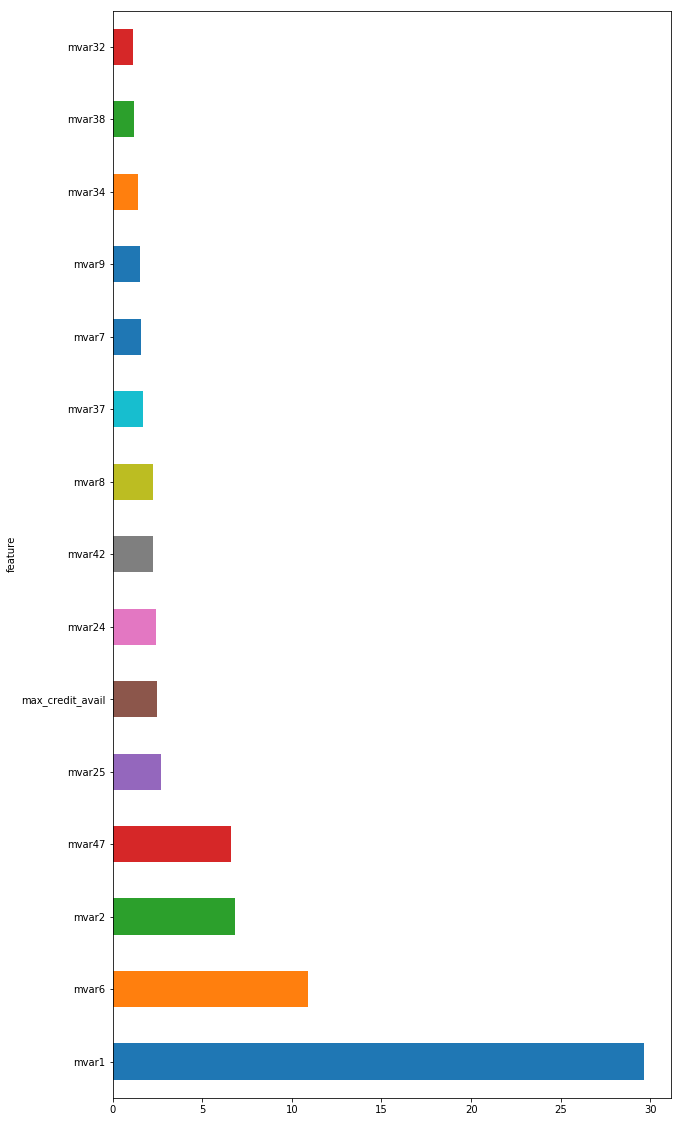

In [25]:
print("Features importance...")
gain = model.feature_importance('gain')
ft = pd.DataFrame({'feature':model.feature_name(), 'split':model.feature_importance('split'), 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
print(ft.head(10))

plt.figure()
ft[['feature','gain']].head(15).plot(kind='barh', x='feature', y='gain', legend=False, figsize=(10, 20))
plt.gcf().savefig('features_importance.png')

In [26]:
submission1 = pd.DataFrame({
        "application_key": app_key1,
        "prob": y_pred1,
        "default_ind": a
    })
submission1.default_ind.value_counts()

0    20921
1     4079
Name: default_ind, dtype: int64

In [27]:
submission2 = pd.DataFrame({
        "application_key": app_key2,
        "prob": y_pred2,
        "default_ind": b
    })
submission2.default_ind.value_counts()

0    21192
1     3808
Name: default_ind, dtype: int64

In [30]:
submission1.head()

,application_key,default_ind,prob
0,350053,0,0.045860
1,350054,0,0.039939
2,350055,0,0.127266
3,350056,1,0.655917
4,350057,0,0.095124


In [31]:
submission1 = submission1.sort_values(["prob"], ascending = 1)
submission1.dtypes

application_key      int64
default_ind          int32
prob               float64
dtype: object

In [32]:
submission2 = submission2.sort_values(["prob"], ascending = 1)
submission2.dtypes

application_key      int64
default_ind          int32
prob               float64
dtype: object

In [33]:
submission1=submission1.drop("prob",axis=1)
submission1.to_csv('jaegers_IITRoorkee_00.csv',header=False, index=False)

In [34]:
submission2=submission2.drop("prob",axis=1)
submission2.to_csv('jaegers_IITRoorkee.csv',header=False, index=False)


In [36]:
submission2.tail()

,application_key,default_ind
23170,593245,1
24141,594216,1
22691,592766,1
17976,588051,1
13175,583250,1


# GridSearchCV

In [610]:
params={'boosting_type': 'gbdt',
 'colsample_bytree': 0.65,
 'learning_rate': 0.005,
 'max_bin': 512,
 'max_depth': -1,
 'metric': 'auc',
 'min_child_samples': 5,
 'min_child_weight': 1,
 'min_split_gain': 0.5,
 'nthread': 3,
 'num_class': 1,
 'num_leaves': 23,
 'objective': 'binary',
 'reg_alpha': 0.8,
 'reg_lambda': 1.2,
 'scale_pos_weight': 1,
 'subsample': 0.7,
 'subsample_for_bin': 200,
 'subsample_freq': 1}

gridParams = {
    'learning_rate': [0.005,0.007],
    'n_estimators': [40],
    'num_leaves': [16,23,31],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [14], # Updated from 'seed'
    'colsample_bytree' : [0.65],
    'subsample' : [0.7,0.8],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }



In [611]:
mdl = lightgbm.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

In [612]:
grid = GridSearchCV(mdl, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=2)

In [613]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_bin=512, max_depth=-1, min_child_samples=5,
        min_child_weight=1, min_split_gain=0.5, n_estimators=100, n_jobs=3,
        num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1, silent=True,
        subsample=0.7, subsample_for_bin=200, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'boosting_type': ['gbdt'], 'colsample_bytree': [0.65], 'learning_rate': [0.005, 0.007], 'random_state': [14], 'n_estimators': [40], 'num_leaves': [16, 23, 31], 'reg_lambda': [1, 1.2, 1.4], 'objective': ['binary'], 'reg_alpha': [1, 1.2], 'subsample': [0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [614]:
print(grid.best_params_)
print(grid.best_score_)

{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.007, 'random_state': 14, 'n_estimators': 40, 'num_leaves': 31, 'reg_lambda': 1.2, 'subsample': 0.7, 'objective': 'binary', 'reg_alpha': 1.2}
0.8009125


In [615]:
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']

In [616]:
params

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.65,
 'learning_rate': 0.007,
 'max_bin': 512,
 'max_depth': -1,
 'metric': 'auc',
 'min_child_samples': 5,
 'min_child_weight': 1,
 'min_split_gain': 0.5,
 'nthread': 3,
 'num_class': 1,
 'num_leaves': 31,
 'objective': 'binary',
 'reg_alpha': 1.2,
 'reg_lambda': 1.2,
 'scale_pos_weight': 1,
 'subsample': 0.7,
 'subsample_for_bin': 200,
 'subsample_freq': 1}